In [23]:
import math
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import cv2 as cv
import differint.differint as df

In [24]:
def grad(x):
    return np.array(df.RLpoint(7/9,x))


def norm(x, axis=0):
    return np.sqrt(np.sum(np.square(x), axis=axis))


def stopping_fun(x):
    return 1. / (1. + norm(grad(x))**2)


############

# Funciton for generatign the initial level set function phi
def initialize_phi(x):
    phi = 1.0*np.ones(x.shape[:2])
    b = 10
    phi[b:-b, b:-b] = -1.
    return phi  

# Original image
imgo = cv.imread('C:/Users/lenovo/Desktop/TwoObj.bmp', cv.IMREAD_GRAYSCALE)
img = imgo - np.mean(imgo)
img_smooth = cv.GaussianBlur(img,(5,5),0)


g = stopping_fun(img_smooth)

print(img)
print(imgo)
print(img_smooth)

[[-60.52093506 -61.52093506 -54.52093506 ... -34.52093506 -22.52093506
  -67.52093506]
 [-41.52093506 -33.52093506 -14.52093506 ... -22.52093506 -18.52093506
  -23.52093506]
 [-57.52093506 -40.52093506  -4.52093506 ...   2.47906494 -33.52093506
  -64.52093506]
 ...
 [-41.52093506 -32.52093506   5.47906494 ... -18.52093506 -23.52093506
  -18.52093506]
 [-54.52093506 -46.52093506   8.47906494 ... -30.52093506 -23.52093506
  -79.52093506]
 [-74.52093506 -46.52093506 -52.52093506 ... -53.52093506 -76.52093506
  -47.52093506]]
[[21 20 27 ... 47 59 14]
 [40 48 67 ... 59 63 58]
 [24 41 77 ... 84 48 17]
 ...
 [40 49 87 ... 63 58 63]
 [27 35 90 ... 51 58  2]
 [ 7 35 29 ... 28  5 34]]
[[-44.97406006 -42.26312256 -40.09906006 ... -27.70843506 -28.88812256
  -30.86468506]
 [-43.16156006 -39.27874756 -34.80609131 ... -24.87249756 -28.41546631
  -31.52874756]
 [-39.38031006 -33.84124756 -25.94281006 ... -18.55999756 -27.06390381
  -32.58343506]
 ...
 [-40.41937256 -32.22796631 -18.43890381 ... -20.2

In [25]:
print(norm(grad(img_smooth)))

241916.5024485823


In [26]:
# Initial phi (computed usign the function phi)
phi = initialize_phi(img_smooth)
print(phi)
print(phi.shape)
print(phi[10:-10, 10:-10] )

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(128, 128)
[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


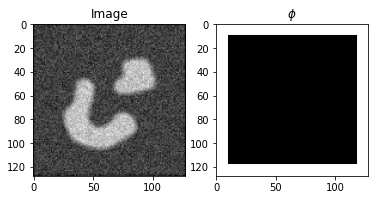

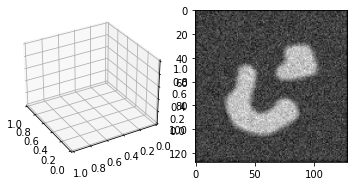

In [27]:
# Plotting the image and initial phi
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Image')
ax2 = fig1.add_subplot(122)
ax2.imshow(phi, cmap='gray')
ax2.title.set_text(r"$\phi$")

# Plotting the (clipped) level-set function phi and the image with level curve
fig2 = plt.figure()
ax2 = fig2.add_subplot(121, projection='3d')
ax2.view_init(elev=30., azim=-210)
M, N = phi.shape
X = np.arange(0, N, 1)
Y = np.arange(0, M, 1)
X, Y = np.meshgrid(X, Y)
ax3 = fig2.add_subplot(122)
ax3.imshow(imgo, cmap='gray')

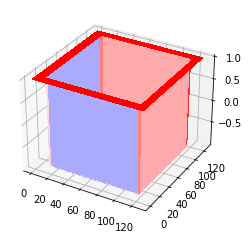

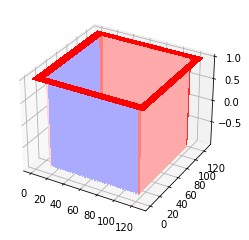

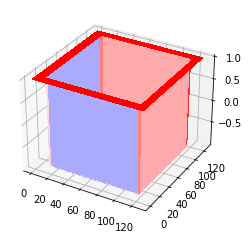

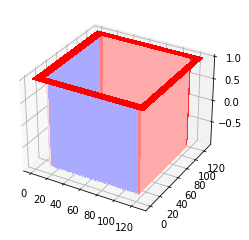

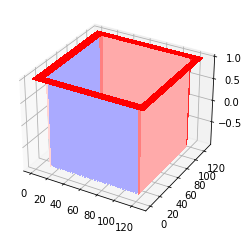

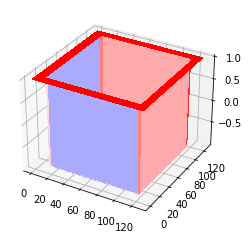

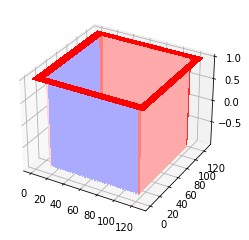

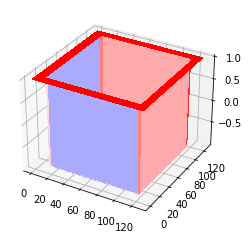

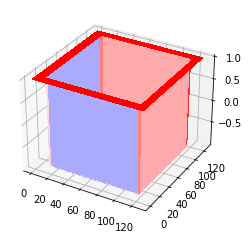

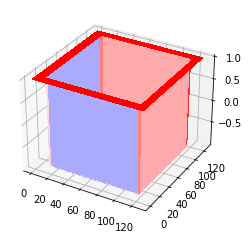

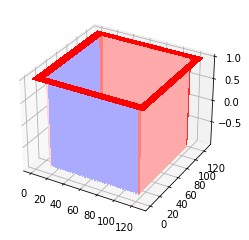

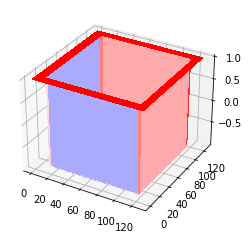

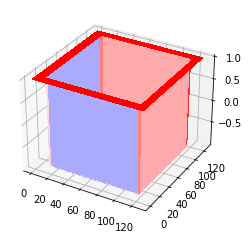

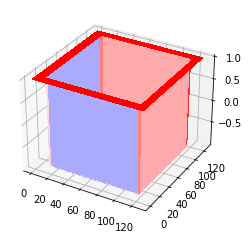

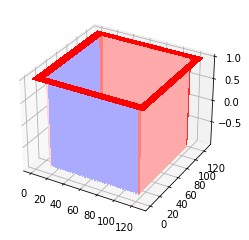

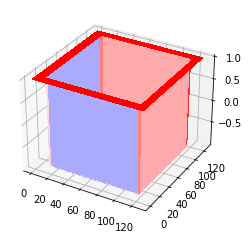

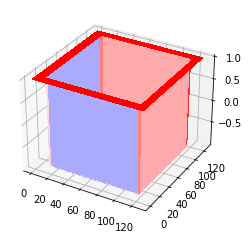

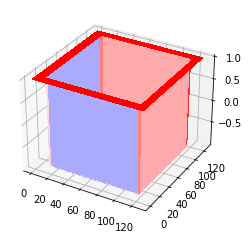

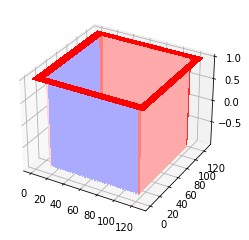

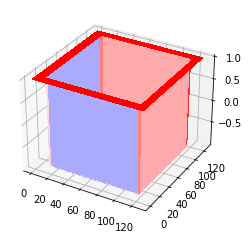

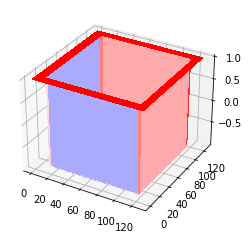

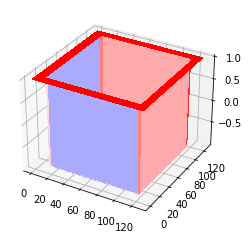

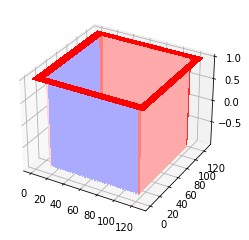

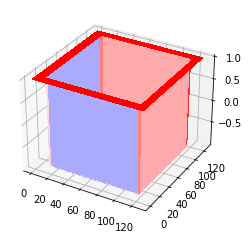

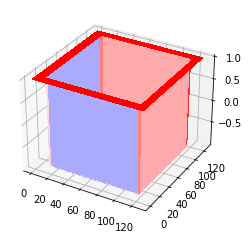

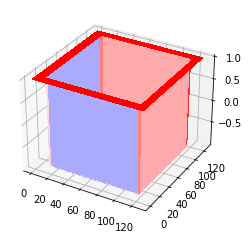

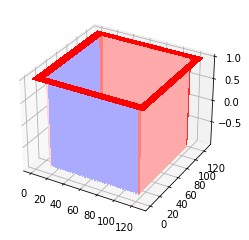

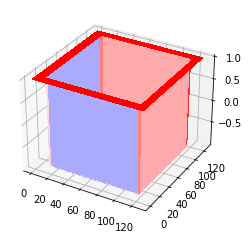

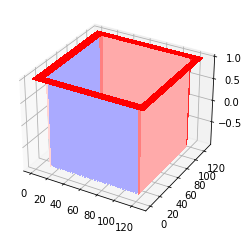

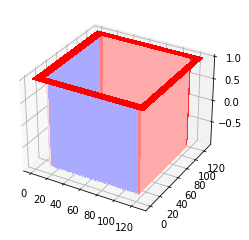

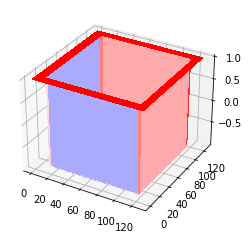

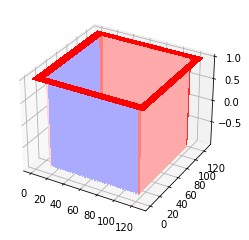

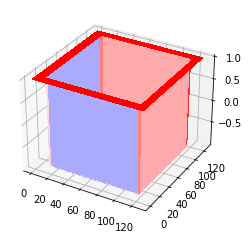

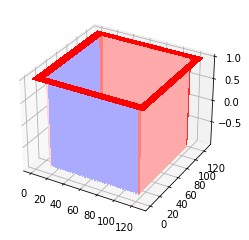

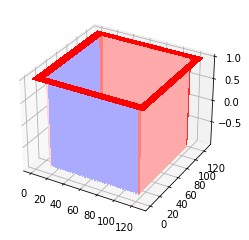

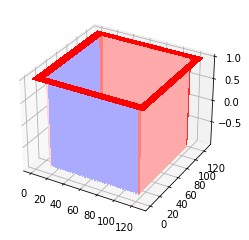

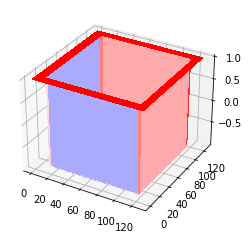

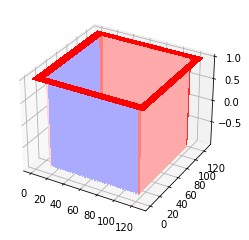

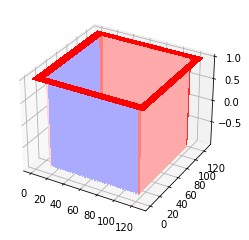

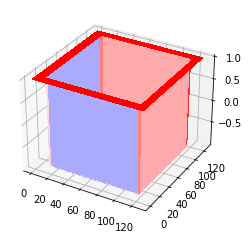

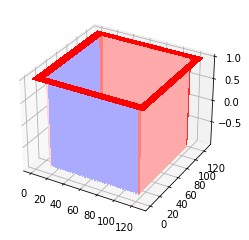

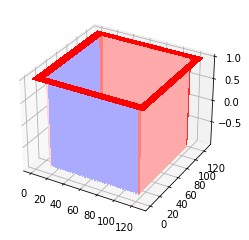

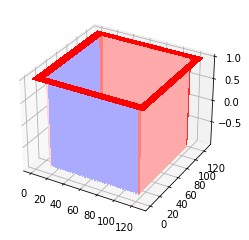

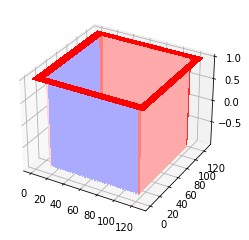

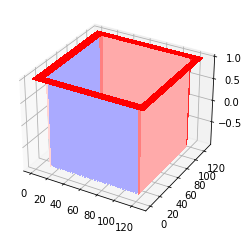

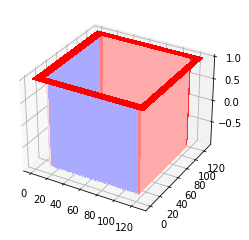

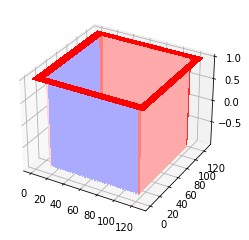

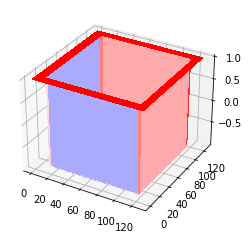

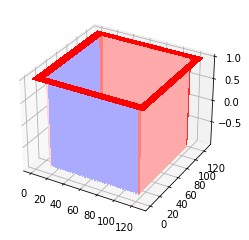

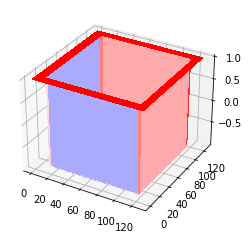

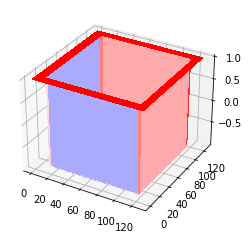

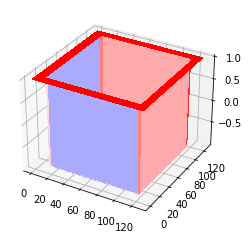

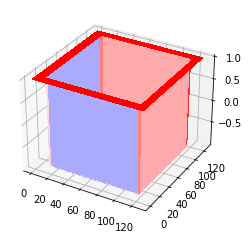

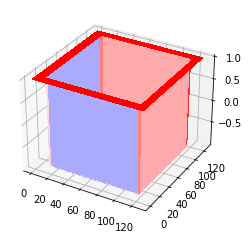

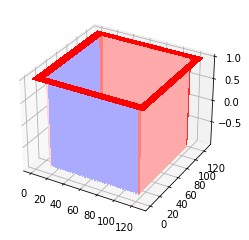

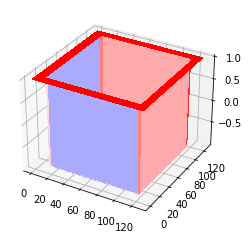

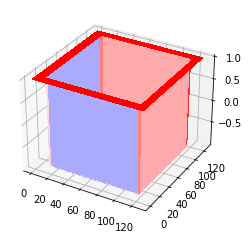

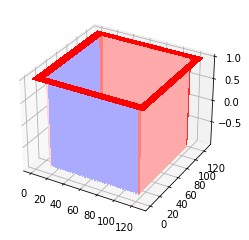

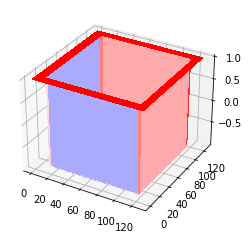

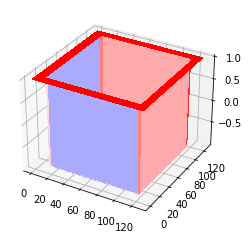

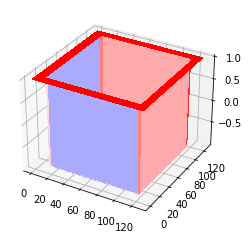

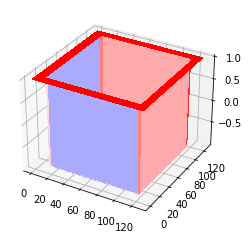

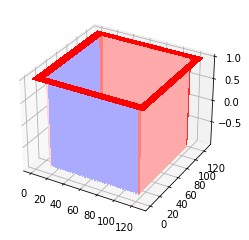

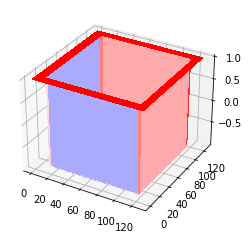

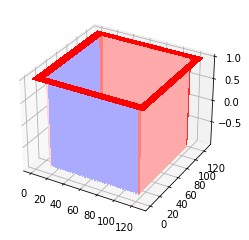

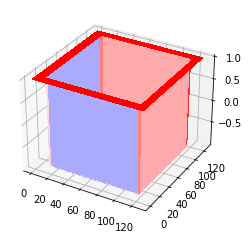

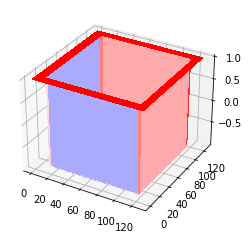

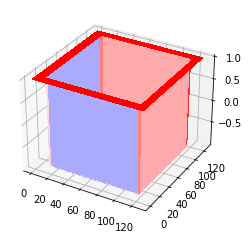

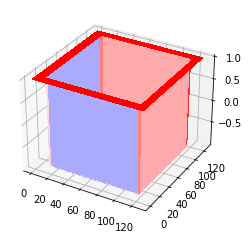

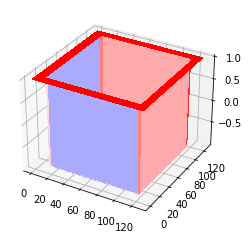

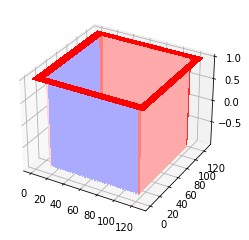

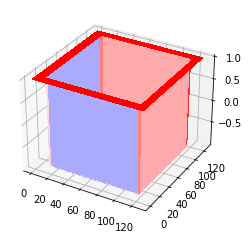

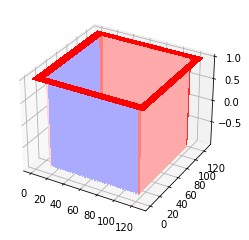

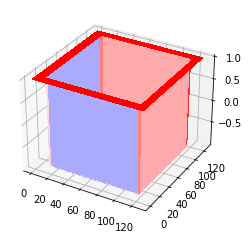

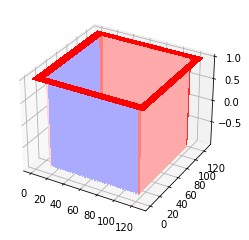

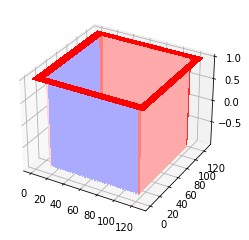

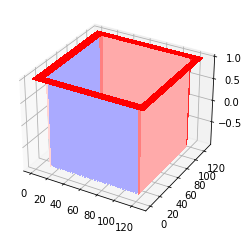

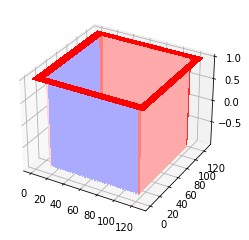

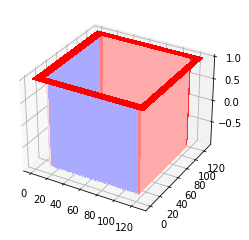

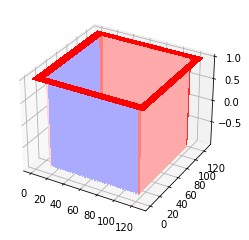

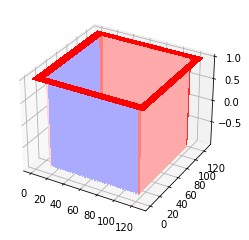

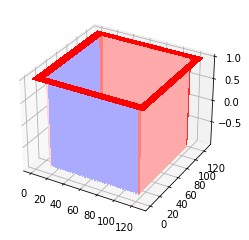

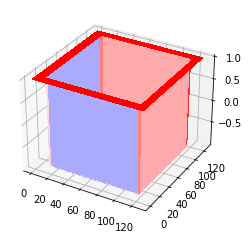

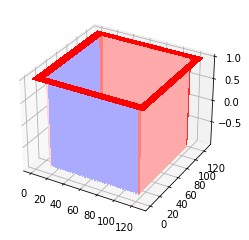

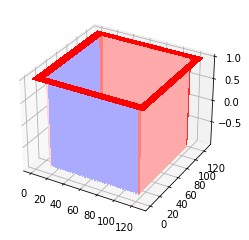

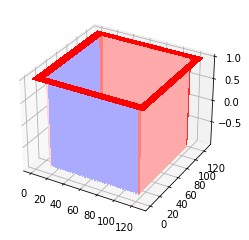

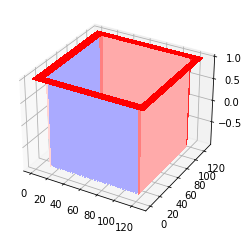

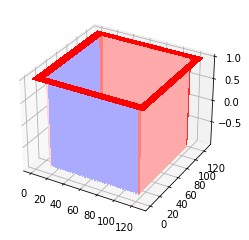

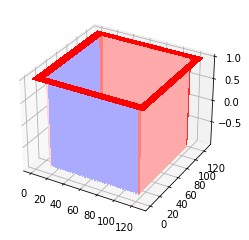

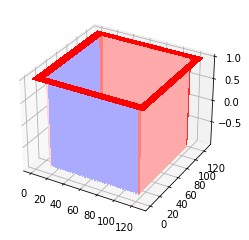

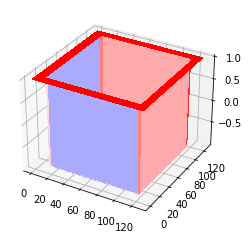

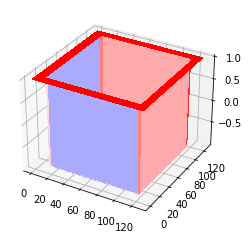

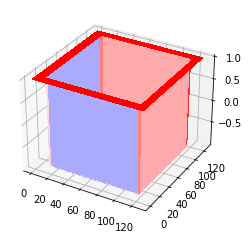

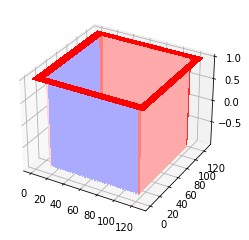

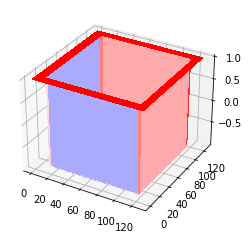

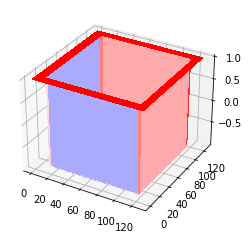

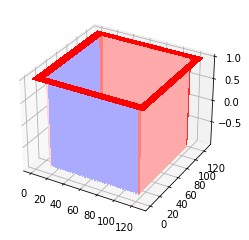

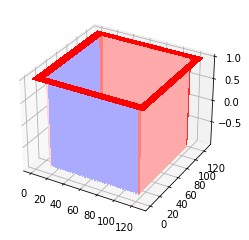

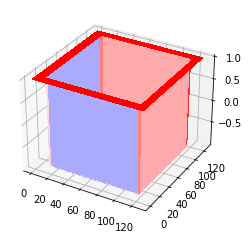

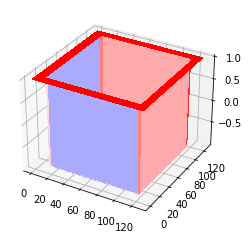

In [28]:

n_iter=100

dt = 1.

for i in range(n_iter):
    dphi = grad(phi)
    dphi_norm = norm(dphi)

    dphi_t = g * dphi_norm

    phi = phi + dt * dphi_t
     # Plotting the level set function phi and the zero-level curve on the image
    fig3 = plt.figure()
    ax2 = fig3.add_subplot(111, projection="3d")
    ax2.cla()
    surf = ax2.plot_surface(X, Y,phi, cmap=cm.bwr,linewidth=0, antialiased=False) 
    plt.pause(0.0001)
    ax3 = fig3.add_subplot(111, projection="3d")
    for c in ax3.collections:
        c.remove()
    ax3.contour(X,Y,phi, levels=[0], colors=['red'])
    fig2.suptitle("Iterations {:d}".format(i))
    

   

In [29]:
print(ax2)
print(ax3)
print(X)
print(Y)
print(phi[10:-10,10:-10])

Axes3DSubplot(0.260833,0.125;0.503333x0.755)
Axes3DSubplot(0.125,0.125;0.775x0.755)
[[  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]
 ...
 [  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [125 125 125 ... 125 125 125]
 [126 126 126 ... 126 126 126]
 [127 127 127 ... 127 127 127]]
[[-0.99999971 -0.99999971 -0.99999971 ... -0.99999971 -0.99999971
  -0.99999971]
 [-0.99999971 -0.99999971 -0.99999971 ... -0.99999971 -0.99999971
  -0.99999971]
 [-0.99999971 -0.99999971 -0.99999971 ... -0.99999971 -0.99999971
  -0.99999971]
 ...
 [-0.99999971 -0.99999971 -0.99999971 ... -0.99999971 -0.99999971
  -0.99999971]
 [-0.99999971 -0.99999971 -0.99999971 ... -0.99999971 -0.99999971
  -0.99999971]
 [-0.99999971 -0.99999971 -0.99999971 ... -0.99999971 -0.99999971
  -0.99999971]]


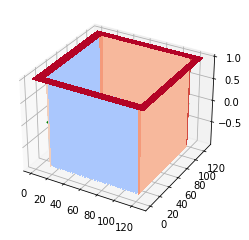

In [30]:
# Plot when iterations are done
fig4 = plt.figure()
ax = fig4.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, phi, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.contour(X,Y,phi, levels=[0], colors=['green'])
plt.show()